<a href="https://colab.research.google.com/github/sadiahuq26/cse303_sec3_spring22/blob/main/2019_1_60_034_lab07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1)  Dot product, Outer Product and Norm of Vector and a Matrix

In [29]:
import numpy as np
import matplotlib.pyplot as plt
x = np.array([[1,2],[3,4]], dtype=np.int32)
y = np.array([[5,6],[7,8]], dtype=np.int32)
v = np.array([9,10])
w = np.array([11,12])
print('Inner Product: ')
print(v.dot(w))
print(np.dot(v,w))
print(np.inner(v,w))
print('Outer Product: ')
print(np.outer(v,w))
print('Norm: ')
print(np.linalg.norm(v)) #euclidean
print(np.linalg.norm(v,1)) #manhattan
print(np.linalg.norm(v,np.inf)) #infinite
print(np.linalg.norm(x))
print(np.linalg.norm(x, axis=1)) #0 for column, 1 for row

Inner Product: 
219
219
219
Outer Product: 
[[ 99 108]
 [110 120]]
Norm: 
13.45362404707371
19.0
10.0
5.477225575051661
[2.23606798 5.        ]


2) Vector-Matrix and Matrix-Matrix Multiplication

In [30]:
print(x.dot(v))
print(np.dot(x,v))

print(x.dot(y))
print(np.dot(x,y))
print(np.matmul(x,y))
print(x @ y)

[29 67]
[29 67]
[[19 22]
 [43 50]]
[[19 22]
 [43 50]]
[[19 22]
 [43 50]]
[[19 22]
 [43 50]]


3) Determinant, Trace and Rank of a Matrix 

In [6]:
m =  np.array([[2,4,6],
               [1,5,9],
               [3,7,8]])
print('Determinant: %.2f'%np.linalg.det(m))
print('Trace: %.2f'%np.trace(m))
print('Rank: ', np.linalg.matrix_rank(m))

Determinant: -18.00
Trace: 15.00
Rank:  3


4) Transpose and Inverse of a Matrix

In [8]:
mt1 = m.T
print(mt1)
mt2 = np.transpose(m)
print(mt2)
inv_m = np.linalg.inv(m)
print(inv_m)

[[2 1 3]
 [4 5 7]
 [6 9 8]]
[[2 1 3]
 [4 5 7]
 [6 9 8]]
[[ 1.27777778 -0.55555556 -0.33333333]
 [-1.05555556  0.11111111  0.66666667]
 [ 0.44444444  0.11111111 -0.33333333]]


5) Solving a Linear System

In [10]:
A = np.array([[1,2],[3,4]])
z = np.array([[5],[6]])
print('Using Inverse: \n', np.linalg.inv(A).dot(z))
print('Using Solve: \n', np.linalg.solve(A, z))

Using Inverse: 
 [[-4. ]
 [ 4.5]]
Using Solve: 
 [[-4. ]
 [ 4.5]]


6) Least Square Solution to a Linear Matrix Equation

[[0. 1. 2. 3. 4. 5. 6. 7. 8.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]]
[ 0.71666667 19.18888889]


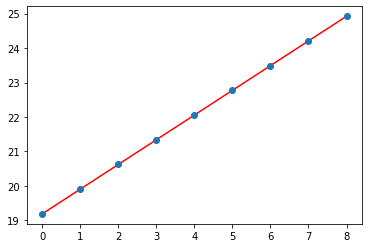

In [13]:
x = np.arange(0,9)
A = np.array([x, np.ones(9)])
print(A)
y = [19, 20, 20.5, 21.5, 22, 23, 23, 25.5, 24]
w = np.linalg.lstsq(A.T, y, rcond=None)[0]
print(w)
line = w[0]*x + w[1]
plt.plot(x, line, 'r-')
plt.plot(x, line, 'o')
plt.show()

7) Eigenvalues and Eigenvectors

In [14]:
A = np.array([[0,1],[-2,-3]])
val, vect = np.linalg.eig(A)
print(val)
print(vect)

[-1. -2.]
[[ 0.70710678 -0.4472136 ]
 [-0.70710678  0.89442719]]


Part 2

1) Importing the Dataset and Splitting into Train and Test Dataset

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
dataset = pd.read_csv('/content/sample_data/SimpleLinearRegression.csv')
dataset.columns = ['YearsExperience', 'Salary']
X = dataset[['YearsExperience']]
y = dataset[['Salary']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

2) Fitting the dataset into Simple Linear Regression Model

In [16]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

3) Predicting the values of the Test set

In [17]:
y_pred = regressor.predict(X_test)

4) Visualizing the Correlation

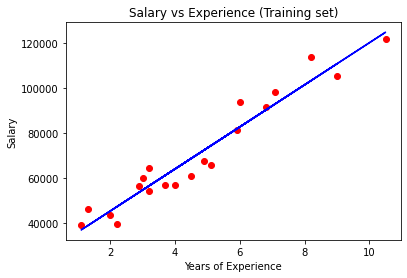

In [22]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

5)  Visualizing the Test Set Results

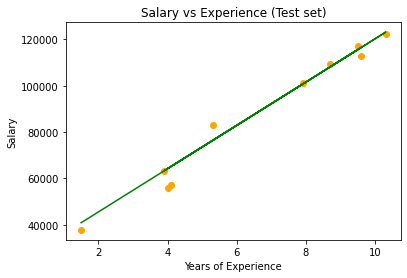

In [31]:
plt.scatter(X_test, y_test, color = 'orange')
plt.plot(X_test, regressor.predict(X_test), color = 'green')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

6) Model Evaluation for Test Dataset

In [28]:
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
print('The Model performnce for testing set')
print('------------------------------------')
print('MAE is %.2f'% mae)
print('MSE is %.2f'% mse)
print('R2 score is %.2f'% r2)

The Model performnce for testing set
------------------------------------
MAE is 3426.43
MSE is 21026037.33
R2 score is 0.97
